In [1]:
%reload_kedro

2020-03-23 14:11:56,581 - root - INFO - ** Kedro project Dynamic Topic Modeling
2020-03-23 14:11:56,582 - root - INFO - Defined global variable `context` and `catalog`


In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [16]:
import torch
import scipy.io
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm
import pickle

In [4]:
emb_size = 300
num_clusters = 7

In [24]:
vocab = open("../franrruiz-data_undebates_largev-318c2c342e6a/split_paragraph_1/min_df_100/vocab.txt", 'r').read().split('\n')

# Skip gram and no DETM training

In [5]:
rho_0 = scipy.io.loadmat("../DETM-master/results/detm_un_K_7_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_1000_RhoSize_300_L_3_minDF_100_trainEmbeddings_0_rho.mat")["values"]

In [6]:
rho_0.shape

(7307, 300)

In [7]:
km = KMeans(n_clusters=num_clusters, n_jobs=-1)
km.fit(list(rho_0))
centroids = km.cluster_centers_
order_centroids = centroids.argsort()[:,::-1]

In [8]:
points_0 = pd.DataFrame(TSNE(n_components=2).fit_transform(rho_0))
points_0['target'] = km.labels_

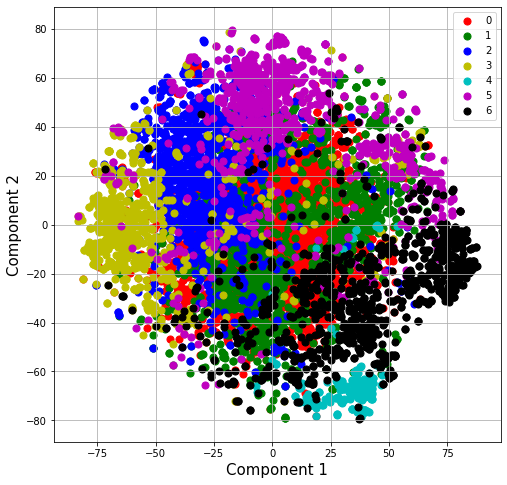

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)

targets = [0, 1, 2, 3, 4, 5, 6]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
for target, color in zip(targets, colors):
    indicesToKeep = points_0['target'] == target
    ax.scatter(points_0.loc[indicesToKeep, 0]
               , points_0.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Skip gram and DETM training

In [10]:
rho_1 = scipy.io.loadmat("../DETM-master/results/detm_un_K_7_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_1000_RhoSize_300_L_3_minDF_100_trainEmbeddings_1_rho.mat")["values"]

In [11]:
km_1 = KMeans(n_clusters=num_clusters, n_jobs=-1)
km_1.fit(list(rho_1))
centroids = km_1.cluster_centers_
order_centroids = centroids.argsort()[:,::-1]

In [12]:
points_1 = pd.DataFrame(TSNE(n_components=2).fit_transform(rho_1))
points_1['target'] = km_1.labels_

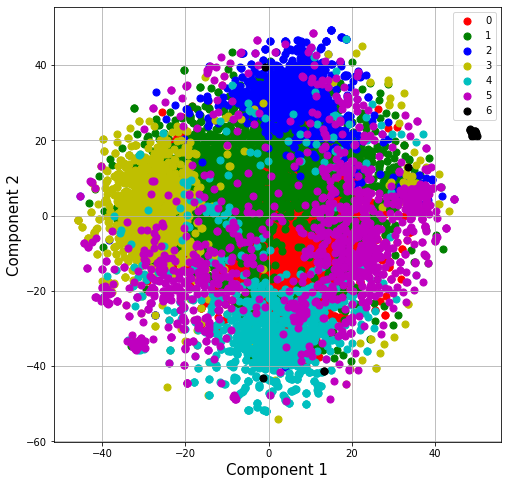

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)

targets = [0, 1, 2, 3, 4, 5, 6]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
for target, color in zip(targets, colors):
    indicesToKeep = points_1['target'] == target
    ax.scatter(points_1.loc[indicesToKeep, 0]
               , points_1.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()